In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns


from statsmodels.stats.diagnostic import het_breuschpagan, het_white, linear_rainbow
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import pandas as pd


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-new/new.csv


In [2]:
df = pd.read_csv('/kaggle/input/data-new/new.csv')
df.drop(columns=['Unnamed: 0'], inplace = True )

In [3]:
# Apply log transformation to the Salary column
df['Log_Salary'] = np.log1p(df['Salary'])
df

,Region,SPB,Mos_region,Moscow,gender,avg_mark,q12_2Participation in extra classes in last 3 years,q12_4IHave sent your works to the competition,q12_6Awards for art,q13_1Self-studying of 1-2 subjects,...,q8_3School magazine or newspaper,"q8_4Foreign language, maths or other subj.society",q8_5School olympiads on studied subjects,q8_6Art society,q8_7Sports sections,q8_9Other,sum of activities proposed by a school,Friends` intentions after the 9 grade,Salary,Log_Salary
0,0.016053,0,0,0,0,4.250,0.0,0.0,0.0,0.0,...,0,1,1,0,1,1,5,1.0,14000,9.546884
1,0.016053,0,0,0,0,3.000,0.0,0.0,0.0,0.0,...,0,1,1,0,1,1,5,1.0,14000,9.546884
2,0.016053,0,0,0,1,3.000,0.0,0.0,0.0,0.0,...,0,1,1,0,1,1,5,2.0,35000,10.463132
3,0.016053,0,0,0,1,2.875,1.0,0.0,0.0,0.0,...,0,1,1,0,1,1,5,1.0,46000,10.736418
4,0.016053,0,0,0,1,3.375,1.0,0.0,0.0,0.0,...,0,1,1,0,1,1,4,3.0,32800,10.398214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.012276,0,0,0,1,3.000,0.0,0.0,0.0,0.0,...,0,1,1,1,1,1,5,3.0,40000,10.596660
1055,0.012276,0,0,0,1,3.750,1.0,0.0,0.0,1.0,...,0,0,1,0,0,0,1,3.0,30000,10.308986
1056,0.012276,0,0,0,0,4.125,1.0,1.0,1.0,3.0,...,0,1,0,0,0,1,2,3.0,27000,10.203629
1057,0.012276,0,0,0,1,3.750,1.0,1.0,0.0,0.0,...,0,1,1,1,0,1,5,3.0,27000,10.203629


In [4]:
df.columns

Index(['Region', 'SPB', 'Mos_region', 'Moscow', 'gender', 'avg_mark',
       'q12_2Participation in extra classes in last 3 years',
       'q12_4IHave sent your works to the competition', 'q12_6Awards for art',
       'q13_1Self-studying of 1-2 subjects', 'q13_3Professional courses',
       'q13_4Musical, art, dance school', 'q13_6Interest club',
       'dummy of extra-curricular activities', 'siblings',
       'mother's education', 'father's education', 'income of a family',
       's8_1 Study desk for the child', 's8_2 A separate room for the child',
       's8_3 A quite place for the child',
       's8_4 Computer your child can use for studying',
       's8_5 Educational software', 's8_6 Access to the Internet',
       's8_7 Classical literature', 's8_8 Poetry',
       's8_9 Books that help your child's studies', 's8_10 Works of art',
       's8_11 Dictionaries', 's8_12 A dishwasher', 's8_13 A DVD-player',
       's8_14 A digital camera', 's8_15 Home cinema',
       's8_16 Satellite

In [5]:
# Split the data into features and target
X = df.drop('Log_Salary', axis=1)
y = df['Log_Salary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Selection
# Select the top k features based on their ANOVA F-values
selector = SelectKBest(f_regression, k=10)
X_new = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print(f"Selected features: {', '.join(selected_features)}")

# Train the linear regression model
model = LinearRegression()
model.fit(X_new, y_train)

# Evaluate the model on the test set
score = model.score(selector.transform(X_test), y_test)
print(f"Model score: {score}")

# Get the feature importances
importances = model.coef_
for feature, importance in zip(selected_features, importances):
    print(f"{feature}: {importance}")

Selected features: Moscow, gender, mother's education, father's education, income of a family, s9_4Number of cars, education, married_man, Friends` intentions after the 9 grade, Salary
Model score: 0.6074206415964658
Moscow: 0.16790797851893566
gender: 0.06775705255257104
mother's education: 0.014758441128460257
father's education: 0.014874976220898246
income of a family: 0.0007118936806245959
s9_4Number of cars: 0.02174537103109315
education: 0.023317166172089093
married_man: 0.056048991384079726
Friends` intentions after the 9 grade: 0.05005403621674223
Salary: 7.773609667610648e-06


In [6]:
# Feature selection using mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
selected_features = mutual_info.sort_values(ascending=False).head(10).index

# Alternative: Feature selection using f_regression
#f_values, p_values = f_regression(X_train, y_train)
#selected_features = X_train.columns[f_values > 10]  # Adjust the threshold as needed

# Train the model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model = LinearRegression()
model.fit(X_train_selected, y_train)

# Evaluate the model on the test set
score = model.score(X_test_selected, y_test)
print(f"Model score: {score}")

# Print the selected features
print(f"Selected features: {', '.join(selected_features)}")

Model score: 0.624897670028141
Selected features: Salary, education, experience_months, Region, working hours per day, average frequency of controlling homework, s10Number of books at home, q13_6Interest club, q8_1Orchestra, chorus, ensemble, s8_8 Poetry


In [7]:
def check_regression_assumptions(model, X, y, frac=0.5):
    """
    Check the assumptions of a linear regression model.
    
    Args:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): Fitted linear regression model.
        X (pandas.DataFrame): Feature variables.
        y (pandas.Series): Target variable.
        frac (float): Fraction of observations to use for the Rainbow test (default: 0.5).
        
    Returns:
        bool: True if all assumptions are satisfied, False otherwise.
    """
    # Check for normality of residuals
    residuals = model.resid
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(residuals, line='s', ax=ax)
    ax.set_title('Q-Q Plot for Normality of Residuals')
    plt.tight_layout()
    plt.show()
    
    # Check for homoscedasticity (constant variance of residuals)
    het_breuschpagan_pval = het_breuschpagan(residuals, model.model.exog)[1]
    het_white_pval = het_white(residuals, model.model.exog)[1]
    print(f"Breusch-Pagan p-value: {het_breuschpagan_pval:.4f}")
    print(f"White's test p-value: {het_white_pval:.4f}")
    
    # Check for multicollinearity
    try:
        if isinstance(frac, (int, float)):
            vif = pd.Series([linear_rainbow(model, [], float(frac))['vif'][1] for _ in X.columns], index=X.columns)
        else:
            print(f"Invalid value for frac: {frac}. Using the default value of 0.5.")
            vif = pd.Series([linear_rainbow(model, [], 0.5)['vif'][1] for _ in X.columns], index=X.columns)
    except ValueError:
        print("Unable to calculate VIF due to the fraction being too small.")
        vif = pd.Series([np.nan] * len(X.columns), index=X.columns)
    print("Variance Inflation Factors (VIF):")
    print(vif)
    
    # Check if assumptions are satisfied
    assumptions_satisfied = (
        het_breuschpagan_pval >= 0.05
        and het_white_pval >= 0.05
        and (vif <= 5).all()
    )
    
    if assumptions_satisfied:
        print("Assumptions seem to be satisfied for the linear regression model.")
    else:
        print("Assumptions violated. Consider using a robust regression model or transforming the data.")
    
    return assumptions_satisfied

In [8]:
import statsmodels.api as sm
# Define target and feature variables
target_variable = 'Log_Salary'
feature_variables = ['experience_months',
 'average frequency of controlling homework',
 'working hours per day',
 'education',
 'Region',
 'sum of activities proposed by a school',
 'avg_mark',
 'income of a family',
 'siblings',
 's10Number of books at home',
 's13_4 Parent ask friends to help child with studies',
 'q7_4Students - winners of int.sch. olimpiads',
 's9_3Number of computers',
 'Friends` intentions after the 9 grade',
 "mother's education",
 'q8_4Foreign language, maths or other subj.society',
 'q8_3School magazine or newspaper',
 's8_14 A digital camera']

# Add a constant term
X = sm.add_constant(df[feature_variables])
model = sm.OLS(df[target_variable], X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_Salary   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.944
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           7.35e-11
Time:                        11:38:38   Log-Likelihood:                -989.35
No. Observations:                1059   AIC:                             2017.
Df Residuals:                    1040   BIC:                             2111.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  10.0476      0.186     54.156      0.000       9.684      10.412
experience_months                                       0.0023      0.001      2.445      0.015       0.000       0.004
average frequency of controlling homework              -0.0179      0.024     -0.744      0.457      -0.065       0.029
working hours per day                                  -0.0103      0.005     -2.014      0.044      -0.020      -0.000
education                                               0.0447      0.016      2.744      0.006       0.013       0.077
Region                                                  3.8871      1.581      2.458      0.014       0.785       6.990
sum of activities proposed by a school                 -0.0219      0.018     -1.204      0.229      -0.058       0.014
avg_mark                                               -0.0060      0.037     -0.164      0.870      -0.078       0.066
income of a family                                      0.0641      0.019      3.368      0.001       0.027       0.101
siblings                                                0.0289      0.020      1.457      0.146      -0.010       0.068
s10Number of books at home                              0.0050      0.016      0.306      0.760      -0.027       0.037
s13_4 Parent ask friends to help child with studies    -0.0260      0.041     -0.638      0.524      -0.106       0.054
q7_4Students - winners of int.sch. olimpiads            0.0155      0.040      0.384      0.701      -0.064       0.095
s9_3Number of computers                                 0.0236      0.031      0.753      0.452      -0.038       0.085
Friends` intentions after the 9 grade                   0.0291      0.029      0.996      0.319      -0.028       0.086
mother's education                                      0.0288      0.013      2.148      0.032       0.002       0.055
q8_4Foreign language, maths or other subj.society       0.0939      0.052      1.822      0.069      -0.007       0.195
q8_3School magazine or newspaper                        0.0356      0.050      0.716      0.474      -0.062       0.133
s8_14 A digital camera                                 -0.0060      0.047     -0.126      0.900      -0.099       0.087
==============================================================================
Omnibus:                       73.322   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.497
Skew:                           0.177   Prob(JB):                     5.04e-64
Kurtosis:                       5.546   Cond. No.                     2.70e+03
================================================

In [9]:
# Save the summary to a CSV file
l = results.summary().as_csv()
with open('with_parents.csv', 'w') as f:
    f.write(l)

In [10]:
def check_regression_assumptions(model, X, y, frac=0.5):
    """
    Check the assumptions of a linear regression model and get the model score.
    
    Args:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): Fitted linear regression model.
        X (pandas.DataFrame): Feature variables.
        y (pandas.Series): Target variable.
        frac (float): Fraction of observations to use for the Rainbow test (default: 0.5).
        
    Returns:
        bool: True if all assumptions are satisfied, False otherwise.
        dict: Dictionary containing model scores (R-squared and Adjusted R-squared).
    """
    # Check for normality of residuals
    residuals = model.resid
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(residuals, line='s', ax=ax)
    ax.set_title('Q-Q Plot for Normality of Residuals')
    plt.tight_layout()
    plt.show()
    
    # Check for homoscedasticity (constant variance of residuals)
    het_breuschpagan_pval = het_breuschpagan(residuals, model.model.exog)[1]
    het_white_pval = het_white(residuals, model.model.exog)[1]
    print(f"Breusch-Pagan p-value: {het_breuschpagan_pval:.4f}")
    print(f"White's test p-value: {het_white_pval:.4f}")
    
    # Check for multicollinearity
    vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    print("Variance Inflation Factors (VIF):")
    print(vif)
    
    # Rainbow test for linearity
    rainbow_stat, rainbow_pval = linear_rainbow(model, frac=frac)
    print(f"Rainbow test p-value: {rainbow_pval:.4f}")
    
    # Check if assumptions are satisfied
    assumptions_satisfied = (
        het_breuschpagan_pval >= 0.05
        and het_white_pval >= 0.05
        and (vif <= 5).all()
        and rainbow_pval >= 0.05
    )
    
    if assumptions_satisfied:
        print("Assumptions seem to be satisfied for the linear regression model.")
    else:
        print("Assumptions violated. Consider using a robust regression model or transforming the data.")
    
    # Get model scores
    model_scores = {
        'R-squared': model.rsquared,
        'Adjusted R-squared': model.rsquared_adj
    }
    print(f"R-squared: {model_scores['R-squared']:.4f}")
    print(f"Adjusted R-squared: {model_scores['Adjusted R-squared']:.4f}")
    
    return assumptions_satisfied, model_scores

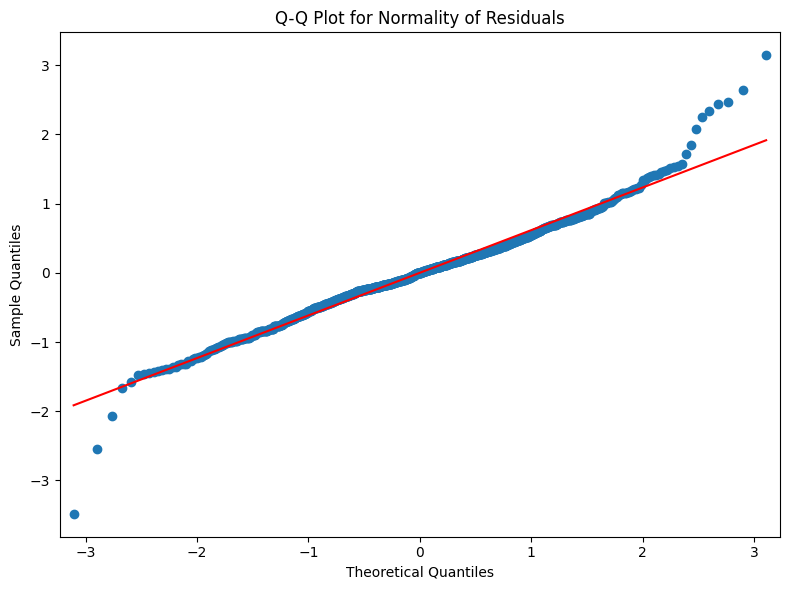

Breusch-Pagan p-value: 0.5481
White's test p-value: 0.8545
Variance Inflation Factors (VIF):
const                                                94.221377
experience_months                                     1.034085
average frequency of controlling homework             1.088871
working hours per day                                 1.046860
education                                             1.285273
Region                                                1.068605
sum of activities proposed by a school                2.640544
avg_mark                                              1.291693
income of a family                                    1.292834
siblings                                              1.059713
s10Number of books at home                            1.259877
q7_4Students - winners of int.sch. olimpiads          1.115326
s9_3Number of computers                               1.193964
Friends` intentions after the 9 grade                 1.169800
mother's education       

In [11]:
# Define target and feature variables
target_variable = 'Log_Salary'
feature_variables = ['experience_months',
 'average frequency of controlling homework',
 'working hours per day',
 'education',
 'Region',
 'sum of activities proposed by a school',
 'avg_mark',
 'income of a family',
 'siblings',
 's10Number of books at home',
 'q7_4Students - winners of int.sch. olimpiads',
 's9_3Number of computers',
 'Friends` intentions after the 9 grade',
 "mother's education",
 'q8_4Foreign language, maths or other subj.society',
 'q8_3School magazine or newspaper',
 's8_14 A digital camera']

# Add a constant term to feature variables
X = sm.add_constant(df[feature_variables])
y = df[target_variable]

# Fit the model
model = sm.OLS(y, X).fit()
# Save the summary to a CSV file
l = results.summary().as_csv()
with open('without_parents.csv', 'w') as f:
    f.write(l)

# Check assumptions and get model score
assumptions_satisfied, model_scores = check_regression_assumptions(model, X, y)


In [12]:
# Define target and feature variables
target_variable = 'Log_Salary'
feature_variables = ['experience_months',
 'average frequency of controlling homework',
 'working hours per day',
 'education',
 'Region',
 'sum of activities proposed by a school',
 'avg_mark',
 'income of a family',
 'siblings',
 's10Number of books at home',
 's13_4 Parent ask friends to help child with studies',
 'q7_4Students - winners of int.sch. olimpiads',
 's9_3Number of computers',
 'Friends` intentions after the 9 grade',
 "mother's education",
 'q8_4Foreign language, maths or other subj.society',
 'q8_3School magazine or newspaper',
 's8_14 A digital camera']

# Add a constant term
X = sm.add_constant(df[feature_variables])
model = sm.OLS(df[target_variable], X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_Salary   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.944
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           7.35e-11
Time:                        11:38:39   Log-Likelihood:                -989.35
No. Observations:                1059   AIC:                             2017.
Df Residuals:                    1040   BIC:                             2111.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  10.0476      0.186     54.156      0.000       9.684      10.412
experience_months                                       0.0023      0.001      2.445      0.015       0.000       0.004
average frequency of controlling homework              -0.0179      0.024     -0.744      0.457      -0.065       0.029
working hours per day                                  -0.0103      0.005     -2.014      0.044      -0.020      -0.000
education                                               0.0447      0.016      2.744      0.006       0.013       0.077
Region                                                  3.8871      1.581      2.458      0.014       0.785       6.990
sum of activities proposed by a school                 -0.0219      0.018     -1.204      0.229      -0.058       0.014
avg_mark                                               -0.0060      0.037     -0.164      0.870      -0.078       0.066
income of a family                                      0.0641      0.019      3.368      0.001       0.027       0.101
siblings                                                0.0289      0.020      1.457      0.146      -0.010       0.068
s10Number of books at home                              0.0050      0.016      0.306      0.760      -0.027       0.037
s13_4 Parent ask friends to help child with studies    -0.0260      0.041     -0.638      0.524      -0.106       0.054
q7_4Students - winners of int.sch. olimpiads            0.0155      0.040      0.384      0.701      -0.064       0.095
s9_3Number of computers                                 0.0236      0.031      0.753      0.452      -0.038       0.085
Friends` intentions after the 9 grade                   0.0291      0.029      0.996      0.319      -0.028       0.086
mother's education                                      0.0288      0.013      2.148      0.032       0.002       0.055
q8_4Foreign language, maths or other subj.society       0.0939      0.052      1.822      0.069      -0.007       0.195
q8_3School magazine or newspaper                        0.0356      0.050      0.716      0.474      -0.062       0.133
s8_14 A digital camera                                 -0.0060      0.047     -0.126      0.900      -0.099       0.087
==============================================================================
Omnibus:                       73.322   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.497
Skew:                           0.177   Prob(JB):                     5.04e-64
Kurtosis:                       5.546   Cond. No.                     2.70e+03
================================================

In [13]:
# specification 1 
# Define target and feature variables
target_variable = 'Log_Salary'
feature_variables = ['experience_months',
 'average frequency of controlling homework',
 'working hours per day',
 'education',
 'Region',
 'sum of activities proposed by a school',
 'avg_mark',
 'income of a family',
 'siblings',
 's10Number of books at home',
 's13_4 Parent ask friends to help child with studies',
 'q7_4Students - winners of int.sch. olimpiads',
 's9_3Number of computers',
 'Friends` intentions after the 9 grade',
 "mother's education",
 's12_3Parent calls teachers to know grades',
 's12_4Parent comes to school to discuss progress']
# Add a constant term
X = sm.add_constant(df[feature_variables])
model1 = sm.OLS(df[target_variable], X)
results = model1.fit()

# Print the summary of the regression results
print(results.summary())

# Save the summary to a CSV file
l = results.summary().as_csv()
with open('1_specification', 'w') as f:
    f.write(l)


# Perform the F-test
f_test = results.f_test("avg_mark = 0")
print("\nF-test p-value:", f_test.pvalue)

# Estimate the average treatment effect (ATE) of 'avg_mark' on salary
avg_mark_coefficient = results.params['avg_mark']
avg_mark_se = results.bse['avg_mark']  # Standard error of the coefficient

# Calculate the average treatment effect (ATE)
avg_treatment_effect = avg_mark_coefficient
avg_treatment_effect_se = avg_mark_se

# Calculate the t-statistic and p-value for the ATE
t_statistic = avg_treatment_effect / avg_treatment_effect_se
p_value = stats.t.sf(abs(t_statistic), results.df_resid) * 2  # Two-tailed test

# Print the ATE and its statistics
print("\nAverage Treatment Effect (ATE):", avg_treatment_effect)
print("Standard Error of ATE:", avg_treatment_effect_se)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


                            OLS Regression Results                            
Dep. Variable:             Log_Salary   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     5.172
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           4.88e-11
Time:                        11:38:39   Log-Likelihood:                -989.89
No. Observations:                1059   AIC:                             2016.
Df Residuals:                    1041   BIC:                             2105.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:             Log_Salary   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     5.172
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           4.88e-11
Time:                        11:38:39   Log-Likelihood:                -989.89
No. Observations:                1059   AIC:                             2016.
Df Residuals:                    1041   BIC:                             2105.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

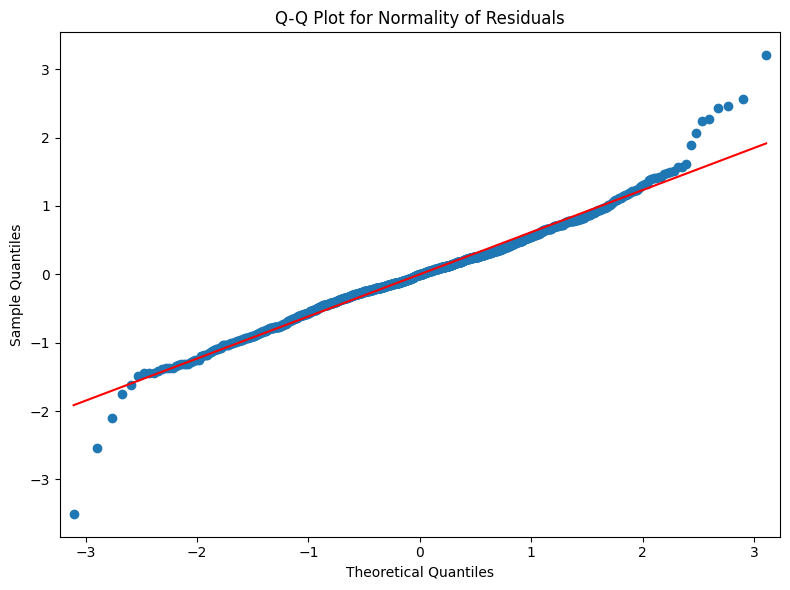

Breusch-Pagan p-value: 0.5960
White's test p-value: 0.8902
Variance Inflation Factors (VIF):
const                                                  92.485856
experience_months                                       1.030200
average frequency of controlling homework               1.133646
working hours per day                                   1.048811
education                                               1.287475
Region                                                  1.072426
sum of activities proposed by a school                  1.118830
avg_mark                                                1.296293
income of a family                                      1.246003
siblings                                                1.062231
s10Number of books at home                              1.254658
s13_4 Parent ask friends to help child with studies     1.049978
q7_4Students - winners of int.sch. olimpiads            1.102246
s9_3Number of computers                                 1.1740

In [14]:
# Define the function to check regression assumptions
def check_regression_assumptions(model, X, y, frac=0.5):
    """
    Check the assumptions of a linear regression model and get the model score.
    
    Args:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): Fitted linear regression model.
        X (pandas.DataFrame): Feature variables.
        y (pandas.Series): Target variable.
        frac (float): Fraction of observations to use for the Rainbow test (default: 0.5).
        
    Returns:
        bool: True if all assumptions are satisfied, False otherwise.
        dict: Dictionary containing model scores (R-squared and Adjusted R-squared).
    """
    # Check for normality of residuals
    residuals = model.resid
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(residuals, line='s', ax=ax)
    ax.set_title('Q-Q Plot for Normality of Residuals')
    plt.tight_layout()
    plt.show()
    
    # Check for homoscedasticity (constant variance of residuals)
    het_breuschpagan_pval = het_breuschpagan(residuals, model.model.exog)[1]
    het_white_pval = het_white(residuals, model.model.exog)[1]
    print(f"Breusch-Pagan p-value: {het_breuschpagan_pval:.4f}")
    print(f"White's test p-value: {het_white_pval:.4f}")
    
    # Check for multicollinearity
    vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    print("Variance Inflation Factors (VIF):")
    print(vif)
    
    # Rainbow test for linearity
    rainbow_stat, rainbow_pval = linear_rainbow(model, frac=frac)
    print(f"Rainbow test p-value: {rainbow_pval:.4f}")
    
    # Check if assumptions are satisfied
    assumptions_satisfied = (
        het_breuschpagan_pval >= 0.05
        and het_white_pval >= 0.05
        and (vif <= 5).all()
        and rainbow_pval >= 0.05
    )
    
    if assumptions_satisfied:
        print("Assumptions seem to be satisfied for the linear regression model.")
    else:
        print("Assumptions violated. Consider using a robust regression model or transforming the data.")
    
    # Get model scores
    model_scores = {
        'R-squared': model.rsquared,
        'Adjusted R-squared': model.rsquared_adj
    }
    print(f"R-squared: {model_scores['R-squared']:.4f}")
    print(f"Adjusted R-squared: {model_scores['Adjusted R-squared']:.4f}")
    
    return assumptions_satisfied, model_scores

# Define target and feature variables
target_variable = 'Log_Salary'
feature_variables = [
    'experience_months',
    'average frequency of controlling homework',
    'working hours per day',
    'education',
    'Region',
    'sum of activities proposed by a school',
    'avg_mark',
    'income of a family',
    'siblings',
    's10Number of books at home',
    's13_4 Parent ask friends to help child with studies',
    'q7_4Students - winners of int.sch. olimpiads',
    's9_3Number of computers',
    'Friends` intentions after the 9 grade',
    "mother's education",
    's12_3Parent calls teachers to know grades',
    's12_4Parent comes to school to discuss progress'
]

# Assuming df is a DataFrame that contains the data
# Add a constant term
X = sm.add_constant(df[feature_variables])
y = df[target_variable]

# Fit the OLS model
model1 = sm.OLS(y, X)
results = model1.fit()

# Print the summary of the regression results
print(results.summary())

# Save the summary to a CSV file
l = results.summary().as_csv()
with open('1_specification.csv', 'w') as f:
    f.write(l)

# Perform the F-test
f_test = results.f_test("avg_mark = 0")
print("\nF-test p-value:", f_test.pvalue)

# Estimate the average treatment effect (ATE) of 'avg_mark' on salary
avg_mark_coefficient = results.params['avg_mark']
avg_mark_se = results.bse['avg_mark']  # Standard error of the coefficient

# Calculate the average treatment effect (ATE)
avg_treatment_effect = avg_mark_coefficient
avg_treatment_effect_se = avg_mark_se

# Calculate the t-statistic and p-value for the ATE
t_statistic = avg_treatment_effect / avg_treatment_effect_se
p_value = stats.t.sf(abs(t_statistic), results.df_resid) * 2  # Two-tailed test

# Print the ATE and its statistics
print("\nAverage Treatment Effect (ATE):", avg_treatment_effect)
print("Standard Error of ATE:", avg_treatment_effect_se)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check assumptions and get model score
assumptions_satisfied, model_scores = check_regression_assumptions(results, X, y)


                            OLS Regression Results                            
Dep. Variable:             Log_Salary   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     6.486
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           5.72e-12
Time:                        11:38:40   Log-Likelihood:                -991.74
No. Observations:                1059   AIC:                             2011.
Df Residuals:                    1045   BIC:                             2081.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

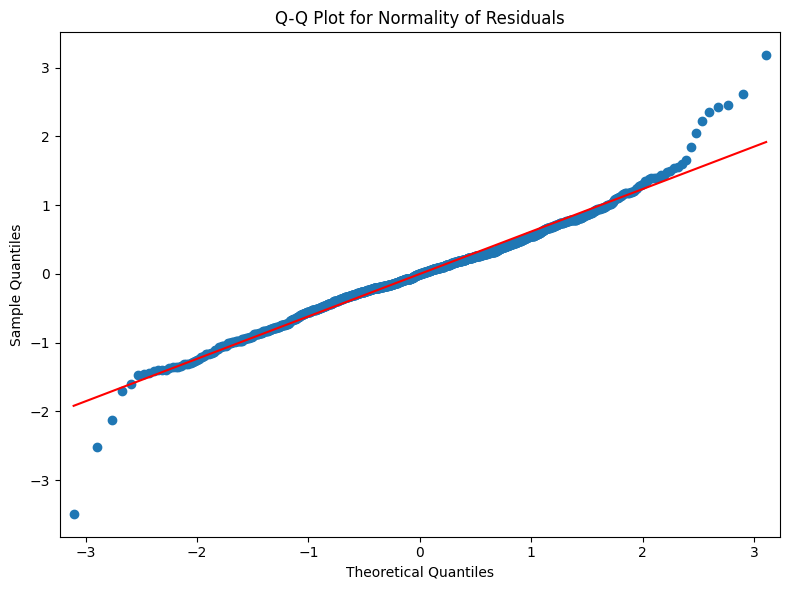

Breusch-Pagan p-value: 0.3857
White's test p-value: 0.6571
Variance Inflation Factors (VIF):
const                                           68.723865
experience_months                                1.029383
working hours per day                            1.045465
education                                        1.274764
Region                                           1.065669
sum of activities proposed by a school           1.114081
avg_mark                                         1.260982
income of a family                               1.241538
siblings                                         1.050757
s10Number of books at home                       1.249926
q7_4Students - winners of int.sch. olimpiads     1.101923
s9_3Number of computers                          1.170114
Friends` intentions after the 9 grade            1.161168
mother's education                               1.336885
dtype: float64
Rainbow test p-value: 0.6407
Assumptions violated. Consider using a robust regre

In [15]:
#specification 2

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Define the function to check regression assumptions
def check_regression_assumptions(model, X, y, frac=0.5):
    """
    Check the assumptions of a linear regression model and get the model score.
    
    Args:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): Fitted linear regression model.
        X (pandas.DataFrame): Feature variables.
        y (pandas.Series): Target variable.
        frac (float): Fraction of observations to use for the Rainbow test (default: 0.5).
        
    Returns:
        bool: True if all assumptions are satisfied, False otherwise.
        dict: Dictionary containing model scores (R-squared and Adjusted R-squared).
    """
    # Check for normality of residuals
    residuals = model.resid
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(residuals, line='s', ax=ax)
    ax.set_title('Q-Q Plot for Normality of Residuals')
    plt.tight_layout()
    plt.show()
    
    # Check for homoscedasticity (constant variance of residuals)
    het_breuschpagan_pval = het_breuschpagan(residuals, model.model.exog)[1]
    het_white_pval = het_white(residuals, model.model.exog)[1]
    print(f"Breusch-Pagan p-value: {het_breuschpagan_pval:.4f}")
    print(f"White's test p-value: {het_white_pval:.4f}")
    
    # Check for multicollinearity
    vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    print("Variance Inflation Factors (VIF):")
    print(vif)
    
    # Rainbow test for linearity
    rainbow_stat, rainbow_pval = linear_rainbow(model, frac=frac)
    print(f"Rainbow test p-value: {rainbow_pval:.4f}")
    
    # Check if assumptions are satisfied
    assumptions_satisfied = (
        het_breuschpagan_pval >= 0.05
        and het_white_pval >= 0.05
        and (vif <= 5).all()
        and rainbow_pval >= 0.05
    )
    
    if assumptions_satisfied:
        print("Assumptions seem to be satisfied for the linear regression model.")
    else:
        print("Assumptions violated. Consider using a robust regression model or transforming the data.")
    
    # Get model scores
    model_scores = {
        'R-squared': model.rsquared,
        'Adjusted R-squared': model.rsquared_adj
    }
    print(f"R-squared: {model_scores['R-squared']:.4f}")
    print(f"Adjusted R-squared: {model_scores['Adjusted R-squared']:.4f}")
    
    return assumptions_satisfied, model_scores

# Define target and feature variables for specification 2
target_variable = 'Log_Salary'
feature_variables = [
    'experience_months',
    'working hours per day',
    'education',
    'Region',
    'sum of activities proposed by a school',
    'avg_mark',
    'income of a family',
    'siblings',
    's10Number of books at home',
    'q7_4Students - winners of int.sch. olimpiads',
    's9_3Number of computers',
    'Friends` intentions after the 9 grade',
    "mother's education"
]

# Assuming df is a DataFrame that contains the data
# Add a constant term
X = sm.add_constant(df[feature_variables])
y = df[target_variable]

# Fit the OLS model
model2 = sm.OLS(y, X)
results = model2.fit()

# Print the summary of the regression results
print(results.summary())

# Save the summary to a CSV file
l = results.summary().as_csv()
with open('2_specification.csv', 'w') as f:
    f.write(l)

# Perform the F-test
f_test = results.f_test("avg_mark = 0")
print("\nF-test p-value:", f_test.pvalue)

# Estimate the average treatment effect (ATE) of 'avg_mark' on salary
avg_mark_coefficient = results.params['avg_mark']
avg_mark_se = results.bse['avg_mark']  # Standard error of the coefficient

# Calculate the average treatment effect (ATE)
avg_treatment_effect = avg_mark_coefficient
avg_treatment_effect_se = avg_mark_se

# Calculate the t-statistic and p-value for the ATE
t_statistic = avg_treatment_effect / avg_treatment_effect_se
p_value = stats.t.sf(abs(t_statistic), results.df_resid) * 2  # Two-tailed test

# Print the ATE and its statistics
print("\nAverage Treatment Effect (ATE):", avg_treatment_effect)
print("Standard Error of ATE:", avg_treatment_effect_se)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check assumptions and get model score
assumptions_satisfied, model_scores = check_regression_assumptions(results, X, y)



                            OLS Regression Results                            
Dep. Variable:             Log_Salary   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.919
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           6.50e-09
Time:                        11:38:40   Log-Likelihood:                -999.00
No. Observations:                1059   AIC:                             2028.
Df Residuals:                    1044   BIC:                             2102.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

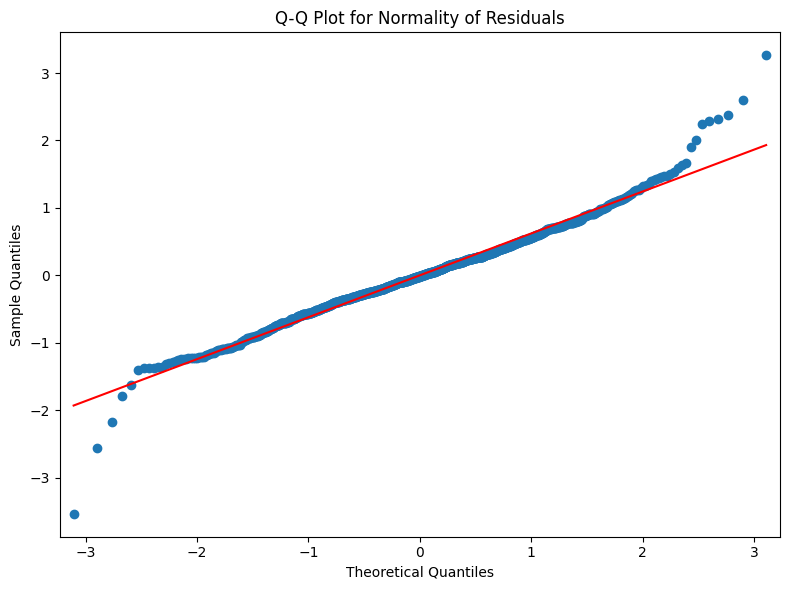

Breusch-Pagan p-value: 0.5460
White's test p-value: 0.8024
Variance Inflation Factors (VIF):
const                                                  78.827580
average frequency of controlling homework               1.129159
Region                                                  1.062107
sum of activities proposed by a school                  1.118614
avg_mark                                                1.210848
income of a family                                      1.238433
siblings                                                1.055836
s10Number of books at home                              1.249092
s13_4 Parent ask friends to help child with studies     1.048642
q7_4Students - winners of int.sch. olimpiads            1.100672
s9_3Number of computers                                 1.170336
Friends` intentions after the 9 grade                   1.149379
mother's education                                      1.314975
s12_3Parent calls teachers to know grades               1.1724

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Define the function to check regression assumptions
def check_regression_assumptions(model, X, y, frac=0.5):
    """
    Check the assumptions of a linear regression model and get the model score.
    
    Args:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): Fitted linear regression model.
        X (pandas.DataFrame): Feature variables.
        y (pandas.Series): Target variable.
        frac (float): Fraction of observations to use for the Rainbow test (default: 0.5).
        
    Returns:
        bool: True if all assumptions are satisfied, False otherwise.
        dict: Dictionary containing model scores (R-squared and Adjusted R-squared).
    """
    # Check for normality of residuals
    residuals = model.resid
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(residuals, line='s', ax=ax)
    ax.set_title('Q-Q Plot for Normality of Residuals')
    plt.tight_layout()
    plt.show()
    
    # Check for homoscedasticity (constant variance of residuals)
    het_breuschpagan_pval = het_breuschpagan(residuals, model.model.exog)[1]
    het_white_pval = het_white(residuals, model.model.exog)[1]
    print(f"Breusch-Pagan p-value: {het_breuschpagan_pval:.4f}")
    print(f"White's test p-value: {het_white_pval:.4f}")
    
    # Check for multicollinearity
    vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    print("Variance Inflation Factors (VIF):")
    print(vif)
    
    # Rainbow test for linearity
    rainbow_stat, rainbow_pval = linear_rainbow(model, frac=frac)
    print(f"Rainbow test p-value: {rainbow_pval:.4f}")
    
    # Check if assumptions are satisfied
    assumptions_satisfied = (
        het_breuschpagan_pval >= 0.05
        and het_white_pval >= 0.05
        and (vif <= 5).all()
        and rainbow_pval >= 0.05
    )
    
    if assumptions_satisfied:
        print("Assumptions seem to be satisfied for the linear regression model.")
    else:
        print("Assumptions violated. Consider using a robust regression model or transforming the data.")
    
    # Get model scores
    model_scores = {
        'R-squared': model.rsquared,
        'Adjusted R-squared': model.rsquared_adj
    }
    print(f"R-squared: {model_scores['R-squared']:.4f}")
    print(f"Adjusted R-squared: {model_scores['Adjusted R-squared']:.4f}")
    
    return assumptions_satisfied, model_scores

# Define target and feature variables for specification 3
target_variable = 'Log_Salary'
feature_variables = [
    'average frequency of controlling homework',
    'Region',
    'sum of activities proposed by a school',
    'avg_mark',
    'income of a family',
    'siblings',
    's10Number of books at home',
    's13_4 Parent ask friends to help child with studies',
    'q7_4Students - winners of int.sch. olimpiads',
    's9_3Number of computers',
    'Friends` intentions after the 9 grade',
    "mother's education",
    's12_3Parent calls teachers to know grades',
    's12_4Parent comes to school to discuss progress'
]

# Assuming df is a DataFrame that contains the data
# Add a constant term
X = sm.add_constant(df[feature_variables])
y = df[target_variable]

# Fit the OLS model
model3 = sm.OLS(y, X)
results = model3.fit()

# Print the summary of the regression results
print(results.summary())

# Save the summary to a CSV file
l = results.summary().as_csv()
with open('3_specification.csv', 'w') as f:
    f.write(l)

# Perform the F-test
f_test = results.f_test("avg_mark = 0")
print("\nF-test p-value:", f_test.pvalue)

# Estimate the average treatment effect (ATE) of 'avg_mark' on salary
avg_mark_coefficient = results.params['avg_mark']
avg_mark_se = results.bse['avg_mark']  # Standard error of the coefficient

# Calculate the average treatment effect (ATE)
avg_treatment_effect = avg_mark_coefficient
avg_treatment_effect_se = avg_mark_se

# Calculate the t-statistic and p-value for the ATE
t_statistic = avg_treatment_effect / avg_treatment_effect_se
p_value = stats.t.sf(abs(t_statistic), results.df_resid) * 2  # Two-tailed test

# Print the ATE and its statistics
print("\nAverage Treatment Effect (ATE):", avg_treatment_effect)
print("Standard Error of ATE:", avg_treatment_effect_se)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check assumptions and get model score
assumptions_satisfied, model_scores = check_regression_assumptions(results, X, y)


# Stepwise regression

In [17]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# Define target and initial feature variables
target_variable = 'Log_Salary'
initial_feature_variables = [
    'experience_months',
    'average frequency of controlling homework',
    'working hours per day',
    'education',
    'Region',
    'sum of activities proposed by a school',
    'avg_mark',
    'income of a family',
    'siblings',
    's10Number of books at home',
    's13_4 Parent ask friends to help child with studies',
    'q7_4Students - winners of int.sch. olimpiads',
    's9_3Number of computers',
    'Friends` intentions after the 9 grade',
    "mother's education",
    's12_3Parent calls teachers to know grades',
    's12_4Parent comes to school to discuss progress'
]

# Define the stepwise regression function
def stepwise_regression(df, target, features):
    remaining_features = features[:]
    selected_features = []
    
    while remaining_features:
        # Add a constant term for intercept
        X = sm.add_constant(df[selected_features + remaining_features])
        model = sm.OLS(df[target], X).fit()
        pvals = model.pvalues.iloc[1:]  # exclude the intercept

        # Identify the feature with the lowest p-value
        min_pval_feature = pvals.idxmin()
        min_pval = pvals[min_pval_feature]

        # Add the feature with the lowest p-value to the selected features list
        if min_pval.any() < 0.05:  # Use .any() to check if any value in the Series is less than 0.05
            selected_features.append(min_pval_feature)
            if min_pval_feature in remaining_features:
                remaining_features.remove(min_pval_feature)
        else:
            break

        # Check if avg_mark coefficient is positive
        if 'avg_mark' in selected_features and model.params['avg_mark'] > 0:
            return model, selected_features
    
    return model, selected_features

# Perform stepwise regression
model, selected_features = stepwise_regression(df, target_variable, initial_feature_variables)

# Print the summary of the final model
print(model.summary())

# Display selected features
print("Selected features:", selected_features)

# Check if avg_mark has a positive effect
if 'avg_mark' in model.params and model.params['avg_mark'] > 0:
    avg_mark_coefficient = model.params['avg_mark']
    avg_mark_se = model.bse['avg_mark']  # Standard error of the coefficient

    # Calculate the average treatment effect (ATE)
    avg_treatment_effect = avg_mark_coefficient
    avg_treatment_effect_se = avg_mark_se

    # Calculate the t-statistic and p-value for the ATE
    t_statistic = avg_treatment_effect / avg_treatment_effect_se
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=model.df_resid))  # Two-tailed test

    # Print the ATE and its statistics
    print("\nAverage Treatment Effect (ATE):", avg_treatment_effect)
    print("Standard Error of ATE:", avg_treatment_effect_se)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
else:
    print("No positive effect of avg_mark found in the selected model.")

                            OLS Regression Results                            
Dep. Variable:             Log_Salary   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     5.172
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           4.88e-11
Time:                        11:38:41   Log-Likelihood:                -989.89
No. Observations:                1059   AIC:                             2016.
Df Residuals:                    1041   BIC:                             2105.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [18]:
# Perform stepwise regression
model, selected_features = stepwise_regression(df, target_variable, initial_feature_variables)

# Print the summary of the final model
print(model.summary())

# Display selected features
print("Selected features:", selected_features)

# Check if avg_mark has a positive effect
if 'avg_mark' in model.params and model.params['avg_mark'] > 0:
    avg_mark_coefficient = model.params['avg_mark']
    avg_mark_se = model.bse['avg_mark']  # Standard error of the coefficient

    # Calculate the average treatment effect (ATE)
    avg_treatment_effect = avg_mark_coefficient
    avg_treatment_effect_se = avg_mark_se

    # Calculate the t-statistic and p-value for the ATE
    t_statistic = avg_treatment_effect / avg_treatment_effect_se
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=model.df_resid))  # Two-tailed test

    # Print the ATE and its statistics
    print("\nAverage Treatment Effect (ATE):", avg_treatment_effect)
    print("Standard Error of ATE:", avg_treatment_effect_se)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
else:
    print("No positive effect of avg_mark found in the selected model.")

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Feature': model.params.index,
    'Coefficient': model.params.values,
    'Std. Error': model.bse.values,
    't-statistic': model.tvalues,
    'p-value': model.pvalues
})

# Save the results to an Excel file
results_df.to_excel('stepwise_regression_results.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:             Log_Salary   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     5.172
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           4.88e-11
Time:                        11:38:41   Log-Likelihood:                -989.89
No. Observations:                1059   AIC:                             2016.
Df Residuals:                    1041   BIC:                             2105.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [19]:
df.columns

Index(['Region', 'SPB', 'Mos_region', 'Moscow', 'gender', 'avg_mark',
       'q12_2Participation in extra classes in last 3 years',
       'q12_4IHave sent your works to the competition', 'q12_6Awards for art',
       'q13_1Self-studying of 1-2 subjects', 'q13_3Professional courses',
       'q13_4Musical, art, dance school', 'q13_6Interest club',
       'dummy of extra-curricular activities', 'siblings',
       'mother's education', 'father's education', 'income of a family',
       's8_1 Study desk for the child', 's8_2 A separate room for the child',
       's8_3 A quite place for the child',
       's8_4 Computer your child can use for studying',
       's8_5 Educational software', 's8_6 Access to the Internet',
       's8_7 Classical literature', 's8_8 Poetry',
       's8_9 Books that help your child's studies', 's8_10 Works of art',
       's8_11 Dictionaries', 's8_12 A dishwasher', 's8_13 A DVD-player',
       's8_14 A digital camera', 's8_15 Home cinema',
       's8_16 Satellite

In [20]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame containing the dataset
# Add additional features to the DataFrame
df['Composite_Academic_Score'] = df['avg_mark'] * df['education']
df['Parental_Involvement'] = df['s12_3Parent calls teachers to know grades'] + df['s12_4Parent comes to school to discuss progress']
df['Total_Educational_Resources'] = df['s10Number of books at home'] + df['s9_3Number of computers']
df['Social_Circle_Support'] = df['Friends` intentions after the 9 grade'] * df['siblings']

# Define target and initial feature variables
target_variable = 'Log_Salary'
initial_feature_variables = [
    'experience_months',
    'average frequency of controlling homework',
    'working hours per day',
    'education',
    'Region',
    'sum of activities proposed by a school',
    'avg_mark',
    'income of a family',
    'siblings',
    's10Number of books at home',
    's13_4 Parent ask friends to help child with studies',
    'q7_4Students - winners of int.sch. olimpiads',
    's9_3Number of computers',
    'Friends` intentions after the 9 grade',
    "mother's education",
    's12_3Parent calls teachers to know grades',
    's12_4Parent comes to school to discuss progress',
    'Composite_Academic_Score',
    'Parental_Involvement',
    'Total_Educational_Resources',
    'Social_Circle_Support'
]

def stepwise_regression(df, target, features):
    remaining_features = features[:]
    selected_features = []

    while remaining_features:
        X = sm.add_constant(df[selected_features + remaining_features])
        model = sm.OLS(df[target], X).fit()
        pvals = model.pvalues.iloc[1:]  # exclude the intercept

        min_pval_feature = pvals.idxmin()
        min_pval = pvals[min_pval_feature]

        if min_pval.any() < 0.05:  # Use .any() to check if any element satisfies the condition
            selected_features.append(min_pval_feature)
            if min_pval_feature in remaining_features:
                remaining_features.remove(min_pval_feature)
        else:
            break

    return model, selected_features

# Perform stepwise regression
model, selected_features = stepwise_regression(df, target_variable, initial_feature_variables)

# Print the summary of the final model
print(model.summary())

# Display selected features
print("Selected features:", selected_features)

# Check if avg_mark has a positive effect
if 'avg_mark' in selected_features:
    avg_mark_coefficient = model.params['avg_mark']
    avg_mark_se = model.bse['avg_mark']  # Standard error of the coefficient

    # Calculate the average treatment effect (ATE)
    avg_treatment_effect = avg_mark_coefficient
    avg_treatment_effect_se = avg_mark_se

    # Calculate the t-statistic and p-value for the ATE
    t_statistic = avg_treatment_effect / avg_treatment_effect_se
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=model.df_resid))  # Two-tailed test

    # Print the ATE and its statistics
    print("\nAverage Treatment Effect (ATE):", avg_treatment_effect)
    print("Standard Error of ATE:", avg_treatment_effect_se)
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
else:
    print("No positive effect of avg_mark found in the selected model.")

                            OLS Regression Results                            
Dep. Variable:             Log_Salary   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     4.671
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.78e-10
Time:                        11:38:41   Log-Likelihood:                -989.42
No. Observations:                1059   AIC:                             2019.
Df Residuals:                    1039   BIC:                             2118.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [21]:
def stepwise_regression_until_significant(df, target, features):
    remaining_features = features[:]
    selected_features = []

    while remaining_features:
        # Add a constant term for intercept
        X = sm.add_constant(df[selected_features + remaining_features])
        model = sm.OLS(df[target], X).fit()
        pvals = model.pvalues.iloc[1:]  # exclude the intercept

        # Identify the feature with the lowest p-value
        min_pval_feature = pvals.idxmin()
        min_pval = pvals[min_pval_feature]

        # Add the feature with the lowest p-value to the selected features list
        if min_pval.any() < 0.05:  # Use .any() to check if any element satisfies the condition
            selected_features.append(min_pval_feature)
            if min_pval_feature in remaining_features:
                remaining_features.remove(min_pval_feature)
        else:
            break

    return model, selected_features



# Perform stepwise regression until 'avg_mark' becomes significant
model, selected_features = stepwise_regression_until_significant(df, target_variable, initial_feature_variables)

# Check if 'avg_mark' has become significant
if 'avg_mark' in selected_features and model.pvalues['avg_mark'] < 0.05:
    print("The 'avg_mark' is now statistically significant.")
else:
    print("The 'avg_mark' is still not statistically significant after feature elimination.")


The 'avg_mark' is still not statistically significant after feature elimination.
